# КТ-2

Томашук Анна Э-2109

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [189]:
# загружаем данные
df = pd.read_csv('laptop_price.csv', encoding='latin1') # была проблема с кодировкой, поставила другую

In [190]:
# познакомимся с данными
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Целевая переменная в этом случае - Price_euros, остальные столбцы (исключая laptop_ID - факторы)

### Предобработка данных 

In [191]:
# проверими наличие дубликатов
df.duplicated().sum()

0

In [192]:
# посмотрим на пропущенные значения
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

В наших данных нет дубликатов и пропущенных значений, можно продолжать работу.

## Обработка данных 

Для дальнейшей работы выясним, какие переменные у нас количественные, а какие - категориальные.

In [193]:
# посмотрим на тип данных в столбцах датасета
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

Столбец Inches - количественный, изучим остальные.

Кажется, будто бы столбцы Ram, Weight, Memory  тоже должны содержать числовые данные, так как память и вес ноутбука - это число. Для прочтения столбцов Ram, Weight как числовых "мешают" единицы измерения.
<br>
Не спешим их удалять, проверим, что все данные в столбцах имеют одну единицу измерения.

### Обработка столбцов  Ram и Weight

In [194]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [195]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [196]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

В столбце Ram единицы измерения - 'GB', а в столбце Weight - 'kg'. Уберем единицы измерения, чтобы сделать столбцы количественными.
<br>
Со столбцом 'Memory' ситуация иная, разберем позже

In [197]:
df['Ram'] = pd.to_numeric(df['Ram'].str.split('GB', expand= True )[0]) # не забудем изменить тип данных, т.к. до этого - строка

In [198]:
df['Weight'] = pd.to_numeric(df['Weight'].str.split('kg', expand= True )[0])

In [199]:
# посмотрим всё ли получилось
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
dtype: object

### Обработка столбца  Memory

Разберемся со столбцом 'Memory'. В Интернете было найдено, что SSD, Flash Storage,HDD и др - это тип накопителя. Всё, что стоит до пробела - это как раз таки память компьютера. Разделим столбец по разделителю - проблем и создадим 2 столбца: первый - 'Memory', второй - 'Storage Device'

In [200]:
df[['Memory', 'Storage Device']] = df['Memory'].str.split(' ', 1,  expand= True)

Также изучим единицы измерения в столбце 'Memory'

In [201]:
df['Memory'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

Есть значения '1TB' и '2TB', необходимо перевести в GB для единства измерения (1ТВ = 1024 GB)

In [202]:
# произведем замену значений
replace_memory = {'1TB':'1000GB', '1.0TB': '1024GB', '2TB': '2048GB'}
df['Memory'] = df['Memory'].replace(replace_memory, regex=True)

In [203]:
# проверим, все ли правильно получилось
df['Memory'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1000GB', '32GB', '64GB',
       '2048GB', '1024GB', '16GB', '180GB', '240GB', '8GB', '508GB'],
      dtype=object)

In [204]:
# как и раньше уберем единицы измерения из столбца, чтобы привести данные в нем к количественному типу
df['Memory'] = pd.to_numeric(df['Memory'].str.split('GB', expand= True )[0])

In [205]:
# посмотрим всё ли получилось
df['Memory'].dtypes

dtype('int64')

В процессе изучения данных были обнаружены еще 3 столбцы, откуда можно найти количественные данные: 'Cpu', 'Gpu', 'ScreenResolution'. Проведем обработку этих столбцов по отдельности.

### Обработка столбца  Cpu

Перед обработкой познакомимся с данными. CPU, central processing unit — «центральное обрабатывающее устройство»  или процессор ноутбука. То есть в исследуемом столбце содержится информация о процессоре ноутбука.

In [206]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

Процессор в нашем случае имеет две характеритики: тип и татовую частоту. Что касается типа процессора, то есть разные его разновидности. В наших данных Intel Core i5 7200U и Intel Core i7 7700HQ - два разных типа. Для построение регрессии сделаем общий тип процессора, для рассматриваемого случая это будет просто Intel Core i7. Тактовая частота (clock rate) - мера того, как быстро центральный процессор (CPU) компьютера может выполнять инструкции. Измеряется в гигагерцах.
<br>
Попробуем реализовать задумку в коде.

In [207]:
# разъединим столбец Cpu на тип процессора и частоту
df['Cpu_type'] = df['Cpu'].str.rsplit(' ', 1, expand=True)[0]
df['Clock_rate'] = df['Cpu'].str.rsplit(' ', 1, expand=True)[1]

In [208]:
# для тактовой частоты уберем единицы измерения, как делали это ранее
df['Clock_rate'] = pd.to_numeric(df['Clock_rate'].str.split('GHz', expand= True )[0])

In [209]:
# убедимся, что всё получилось
df['Clock_rate'].value_counts()

2.50    293
2.70    166
2.80    165
1.60    134
2.30     86
2.00     86
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
3.20      1
1.00      1
1.92      1
Name: Clock_rate, dtype: int64

In [210]:
# продолжим работу с типом процессора
df['Cpu_type'].unique()

array(['Intel Core i5', 'Intel Core i5 7200U', 'Intel Core i7',
       'AMD A9-Series 9420', 'Intel Core i7 8550U', 'Intel Core i5 8250U',
       'Intel Core i3 6006U', 'Intel Core M m3', 'Intel Core i7 7500U',
       'Intel Core i3 7100U', 'Intel Atom x5-Z8350',
       'Intel Core i5 7300HQ', 'AMD E-Series E2-9000e',
       'Intel Core i7 8650U', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220',
       'Intel Celeron Dual Core N3350', 'Intel Core i3 7130U',
       'Intel Core i7 7700HQ', 'AMD Ryzen 1700',
       'Intel Pentium Quad Core N4200', 'Intel Atom x5-Z8550',
       'Intel Celeron Dual Core N3060', 'AMD FX 9830P',
       'Intel Core i7 7560U', 'AMD E-Series 6110', 'Intel Core i5 6200U',
       'Intel Core M 6Y75', 'Intel Core i5 7500U', 'Intel Core i7 6920HQ',
       'Intel Core i5 7Y54', 'Intel Core i7 7820HK',
       'Intel Xeon E3-1505M V6', 'Intel Core i7 6500U',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-922

Будто бы нам "мешается" то, что стоит после последнего пробела, удалим это

In [211]:
df['Cpu_type'] = df['Cpu_type'].str.rsplit(' ', 1 , expand= True )[0]

In [212]:
df['Cpu_type'].value_counts()

Intel Core i7              523
Intel Core i5              411
Intel Core i3              136
Intel Celeron Dual Core     80
Intel Pentium Quad Core     27
Intel Core                  20
AMD A9-Series               17
Intel Core M                15
Intel Atom                  13
AMD A6-Series               11
AMD E-Series                 9
AMD A12-Series               8
Intel Celeron Quad Core      8
AMD A10-Series               6
AMD Ryzen                    4
AMD A8-Series                4
Intel Pentium Dual Core      3
AMD FX                       2
Intel Xeon E3-1505M          2
Intel Xeon E3-1535M          2
AMD A4-Series                1
Samsung Cortex               1
Name: Cpu_type, dtype: int64

In [213]:
df['Cpu_type'].isna().sum()

0

Так, мы сократили количество уникальных значений в столбце с типом процессора и не допустили появление пропущенных значений. 
<br>
Столбец обработан успешно.

### Обработка столбца  Gpu

Столбец Gpu содержит информацию про графический процессор компьютера. На данную характеритику обращают чаще всего внимания люди, покупающие ноутбук для игровых целей.

In [214]:
#познакомимся со столбцом
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

Изучив информацию о графических процессоров, мною было решено оставить только тип процессора, так как графические процессоры одной фирмы дороже, чем другой. Другие их характеритики не так сильно влияют на цену.

In [215]:
df['Gpu'] = df['Gpu'].apply(lambda x: ' '.join(x.split(' ')[0:2]))

In [216]:
df['Gpu'].value_counts()

Intel HD          639
Nvidia GeForce    368
AMD Radeon        173
Intel UHD          68
Nvidia Quadro      31
Intel Iris         14
AMD FirePro         5
AMD R4              1
Nvidia GTX          1
AMD R17M-M1-70      1
Intel Graphics      1
ARM Mali            1
Name: Gpu, dtype: int64

### Обработка столбца  ScreenResolution 

Познакомимся с данными, которые описывают экран ноутбука

In [217]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

Есть информация о типе монитора, о том сенсорный он или нет, о длине и ширине. Разобьем данные характеристики на 4 независимые

Создадим 2 признака экрана: длина и ширина

In [218]:
# создадим вспомогательный столбец, в который запишем размер экрана через lambda функцию
df['Screen_size'] = df['ScreenResolution'].apply(lambda x: x.rsplit(' ')[-1]
                                                 if len(x) > 8  
                                                 else x)

In [219]:
# разделим столбец на длину и ширину
df['Screen_width'] = df['Screen_size'].str.split('x', 1, expand=True)[0]
df['Screen_height'] = df['Screen_size'].str.split('x', 1, expand=True)[1] 

In [220]:
# удалим вспомогательный столбец
df = df.drop(columns = 'Screen_size')

In [221]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Storage Device,Cpu_type,Clock_rate,Screen_width,Screen_height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris,macOS,1.37,1339.69,SSD,Intel Core,2.3,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD,macOS,1.34,898.94,Flash Storage,Intel Core,1.8,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD,No OS,1.86,575.00,SSD,Intel Core i5,2.5,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon,macOS,1.83,2537.45,SSD,Intel Core,2.7,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris,macOS,1.37,1803.60,SSD,Intel Core,3.1,2560,1600


Признак экрана, говорящий сенсорный он или нет, можно включить как фиктивную переменную, где 1 - экран сенсорный, 0 - экран не сенсорный

In [222]:
import re

In [223]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 
                                                 if re.search('Touchscreen', x) # ищет вхождение в названии
                                                 else 0)

Перейдем к извлечению типа монитора

In [224]:
# Познакомимся еще раз с данными, чтобы понять, что относится к типу, а что уже использовано и не нужно
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [225]:
# как было сделано раньше уберем размер монитора
# НО есть наблюдения, в характеристике экрана которых присутствует информация только о размере экрана, который уже учтен в др. признаке
# создадим группу 'others', куда будем записывать наблюдения, у которых не указана информация о типе экрана
df['Screen_type'] = df['ScreenResolution'].apply(lambda x: ' '.join(x.split(' ')[:-1])
                                                 if len(x) > 10  
                                                 else 'Others')

In [226]:
df['Screen_type'].value_counts()

Full HD                                507
Others                                 314
IPS Panel Full HD                      235
IPS Panel Full HD / Touchscreen         53
Full HD / Touchscreen                   47
Touchscreen                             32
IPS Panel Retina Display                17
Quad HD+ / Touchscreen                  15
IPS Panel Touchscreen                   13
IPS Panel 4K Ultra HD                   12
IPS Panel 4K Ultra HD / Touchscreen     11
IPS Panel                               11
4K Ultra HD / Touchscreen               10
4K Ultra HD                              7
IPS Panel Quad HD+ / Touchscreen         6
IPS Panel Quad HD+                       5
Quad HD+                                 3
IPS Panel Touchscreen / 4K Ultra HD      2
Touchscreen / Quad HD+                   1
Touchscreen / Full HD                    1
Touchscreen / 4K Ultra HD                1
Name: Screen_type, dtype: int64

In [227]:
# есть наблюдения со слэшами - хороший ключ, чтобы разделить строку и взять то, что нам нужно
df['Screen_type'] = df['Screen_type'].apply(lambda x: x.split('/')[0]
                                                    if re.search('/', x)
                                                    else x)

In [228]:
df['Screen_type'].value_counts()

Full HD                     507
Others                      314
IPS Panel Full HD           235
IPS Panel Full HD            53
Full HD                      47
Touchscreen                  32
IPS Panel Retina Display     17
Quad HD+                     15
IPS Panel Touchscreen        13
IPS Panel 4K Ultra HD        12
IPS Panel                    11
IPS Panel 4K Ultra HD        11
4K Ultra HD                  10
4K Ultra HD                   7
IPS Panel Quad HD+            6
IPS Panel Quad HD+            5
Touchscreen                   3
Quad HD+                      3
IPS Panel Touchscreen         2
Name: Screen_type, dtype: int64

In [229]:
# подобно случаю ранее убираем уже учтенный признак 'Touchscreen'
# есть ситуация, где остался только признак есть сенсор или нет => записываем в 'others'
df['Screen_type'] = df['Screen_type'].apply(lambda x: 'Others'
                                                    if re.search('Touchscreen', x)
                                                    else x)

In [230]:
df['Screen_type'].value_counts()

Full HD                     507
Others                      364
IPS Panel Full HD           235
IPS Panel Full HD            53
Full HD                      47
IPS Panel Retina Display     17
Quad HD+                     15
IPS Panel 4K Ultra HD        12
IPS Panel                    11
IPS Panel 4K Ultra HD        11
4K Ultra HD                  10
4K Ultra HD                   7
IPS Panel Quad HD+            6
IPS Panel Quad HD+            5
Quad HD+                      3
Name: Screen_type, dtype: int64

In [231]:
# преобразования породили такую ситуацию, когда сохранились ненужные пробелы, удалим их
df['Screen_type'] = df['Screen_type'].str.strip()

In [232]:
df['Screen_type'].value_counts()

Full HD                     554
Others                      364
IPS Panel Full HD           288
IPS Panel 4K Ultra HD        23
Quad HD+                     18
IPS Panel Retina Display     17
4K Ultra HD                  17
IPS Panel                    11
IPS Panel Quad HD+           11
Name: Screen_type, dtype: int64

Все необходимые столбцы обработаны. Удалим в датасета столбцы, которые не нужны при построении модели, так как не влияют на цену.

In [233]:
df_clean = df.copy()
df_clean.drop(['laptop_ID', 'Product', 'ScreenResolution', 'Cpu'], axis = 1, inplace = True)

df_clean.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Storage Device,Cpu_type,Clock_rate,Screen_width,Screen_height,Touchscreen,Screen_type
0,Apple,Ultrabook,13.3,8,128,Intel Iris,macOS,1.37,1339.69,SSD,Intel Core,2.3,2560,1600,0,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,8,128,Intel HD,macOS,1.34,898.94,Flash Storage,Intel Core,1.8,1440,900,0,Others
2,HP,Notebook,15.6,8,256,Intel HD,No OS,1.86,575.00,SSD,Intel Core i5,2.5,1920,1080,0,Full HD
3,Apple,Ultrabook,15.4,16,512,AMD Radeon,macOS,1.83,2537.45,SSD,Intel Core,2.7,2880,1800,0,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,8,256,Intel Iris,macOS,1.37,1803.60,SSD,Intel Core,3.1,2560,1600,0,IPS Panel Retina Display


Ранее количество уникальных значений в столбцах с категориальными данными было сокращено до минимума, на данном этапе закодируем категориальные переменные.

In [234]:
df_clean = pd.get_dummies(df_clean)
df_clean.head()

,Inches,Ram,Memory,Weight,Price_euros,Clock_rate,Touchscreen,Company_Acer,Company_Apple,Company_Asus,...,Screen_height_900,Screen_type_4K Ultra HD,Screen_type_Full HD,Screen_type_IPS Panel,Screen_type_IPS Panel 4K Ultra HD,Screen_type_IPS Panel Full HD,Screen_type_IPS Panel Quad HD+,Screen_type_IPS Panel Retina Display,Screen_type_Others,Screen_type_Quad HD+
0,13.3,8,128,1.37,1339.69,2.3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,13.3,8,128,1.34,898.94,1.8,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,15.6,8,256,1.86,575.00,2.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,15.4,16,512,1.83,2537.45,2.7,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,13.3,8,256,1.37,1803.60,3.1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Построение модели 

Следующий шаг - разделение данных на признаки-факторы и признак-результат

In [237]:
X = df_clean.drop(['Price_euros'], axis=1)
y = df_clean[['Price_euros']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [238]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(train_X, train_y)

# делаем прогнозы
predictions = model.predict(test_X)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.8025303098371858
MSE: 105730.04880460276


Без каких-либо преобразований при построении модели линейной регрессии получился высокий коэф-т детерминации, однако средняя квадратическая ошибка также очень большая. Попробуем улучшить данные показатели.
<br>
Первым шагом попробуем удалить выбросы

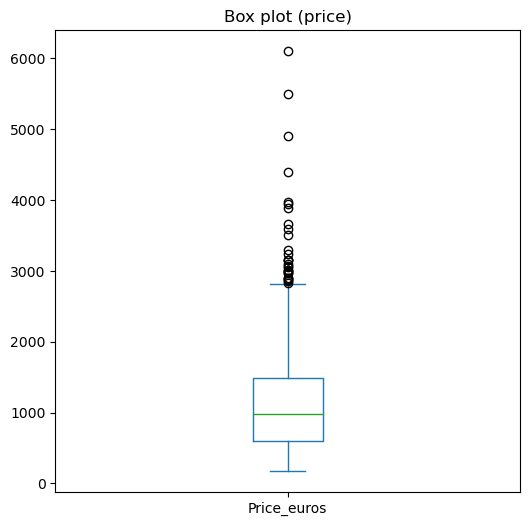

In [244]:
plt.figure(figsize=(6, 6))
df_clean['Price_euros'].plot(kind='box', title='Box plot (price)')
plt.show()

In [247]:
z_scores = st.zscore(df_clean['Price_euros'])

outliers = (df_clean['Price_euros'][(z_scores > 3) | (z_scores < -3)]).count()
print('Количество выбросов', outliers)

Количество выбросов 12


По z-оценке количество выбросов очень маленькое, поэтому имеем право удалить их и перезаписать датасет

In [248]:
#перезапишем датасет без выбросов
df_no_outliers = df_clean[(z_scores < 3) & (z_scores > -3)]

Построим новую модель

In [333]:
X = df_no_outliers.drop(['Price_euros'], axis=1)
y = df_no_outliers[['Price_euros']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [334]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(train_X, train_y)

# делаем прогнозы
predictions = model.predict(test_X)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.7649359287603167
MSE: 95777.31049336623


Коэффициент детерминации немного уменьшился, но уменьшилась и средняя квадратическая ошибка, продолжим преобразования.

In [335]:
# создадим полиномиальные признаки 2-ого порядка
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(X)

train_X_pf = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out())
test_X_pf = pd.DataFrame(poly.fit_transform(test_X), columns=poly.get_feature_names_out())

In [336]:
# нормируем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X_pf)
test_X_st = scaler.fit_transform(test_X_pf)

In [321]:
train_X_st.shape

(864, 7140)

7140 признаков будто бы многовато, отберем 50 наиболее важных с помощью F-теста

In [337]:
from sklearn.feature_selection import f_regression, SelectKBest

f_statistic, p_values = f_regression(train_X_st, train_y)

C:\Users\An_to\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [338]:
selector = SelectKBest(f_regression, k=50)

train_X = pd.DataFrame(selector.fit_transform(train_X_st, train_y), columns = selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_X_st), columns = selector.get_feature_names_out())

C:\Users\An_to\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [339]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(train_X, train_y)

# делаем прогнозы
predictions = model.predict(test_X)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.7136527582521404
MSE: 116672.7375101031


Получили более худший результат как по коэф-ту детерминации, так и по средней квадратической ошибке.

Попробуем использовать метод главных компонент

In [340]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, whiten=True)
pca = pca.fit(train_X)

X_train = pca.transform(train_X)
X_test = pca.transform(test_X)

In [341]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, train_y)

# делаем прогнозы
predictions = model.predict(X_test)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.7215735961657179
MSE: 113445.37678153478


Результат улучшился, но не так, как хотелось бы. Попробуем использовать метод РСА для данных, которые были только отчищены от выбросов.

In [346]:
X = df_no_outliers.drop(['Price_euros'], axis=1)
y = df_no_outliers[['Price_euros']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [353]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, whiten=True)
pca = pca.fit(train_X)

X_train = pca.transform(train_X)
X_test = pca.transform(test_X)

In [354]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, train_y)

# делаем прогнозы
predictions = model.predict(X_test)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.773993647782325
MSE: 92086.7253581841


Результат на данный момент является самым лучшим. Попробуем еще четыре способа.

# Lasso

L1 «зануляет» веса при всех сильно скоррелированных признаках, кроме одного. Таким образом, в алгоритм встроен механизм отбора признаков (feature selection) — его применяют, когда нужно снизить размерность и избавиться от дублирующих признаков.

In [358]:
X = df_no_outliers.drop(['Price_euros'], axis=1)
y = df_no_outliers[['Price_euros']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [359]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [360]:
# создадим модель линейной регрессии
model = Lasso()

# обучим нашу модель
model.fit(train_X, train_y)

# делаем прогнозы
predictions = model.predict(test_X)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.7754812603329759
MSE: 91480.5947470443


Средняя квадратическая ошибка уменьшилась, коэф-т детерминации не изменился. Lasso-регрессия лучше справилась с предсказанием, чем обычная линейная.

# Ridge

В случае с L2-регуляризацией веса между скоррелированными признаками будут распределены равномерно.

In [361]:
# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(train_X, train_y)


# делаем прогнозы
predictions = model.predict(test_X)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.7769570279237529
MSE: 90879.29038771596


Ridge показал лучше результаты, чем Lasso.

# Дерево решений

In [362]:
# испортируем библиотеку
from sklearn.tree import DecisionTreeRegressor

In [363]:
dtree = DecisionTreeRegressor(random_state=101)

In [364]:
# обучаем
dtree = dtree.fit(train_X,train_y)

In [366]:
predictions = dtree.predict(test_X)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.6761193176270401
MSE: 131965.81049091206


Дерево решений худще справилось в предсказанием, чем линейная регрессия, регресии Lasso и Ridge. Следующим шагом попробую воспользоваться более сильным методом - методом случайного дерева

# Метод случайного дерева

In [367]:
# испортируем библиотеки
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [368]:
clf_rf = RandomForestRegressor()
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [369]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [370]:
grid_search_cv_clf.fit(train_X, train_y)

C:\Users\An_to\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [371]:
best_clf = grid_search_cv_clf.best_estimator_

In [372]:
best_clf.score(test_X, test_y)

0.82269511470657

In [373]:
predictions = best_clf.predict(test_X)

print(f'R2: {r2_score(test_y, predictions)}')
print(f'MSE: {mean_squared_error(test_y, predictions)}')

R2: 0.82269511470657
MSE: 72243.2184603152


Данный метод оказался самым лучшим из всех использованных. При нем получается самый высокий коэффициент детерминации <b>0,82</b> и самая маленькая средняя квадратическая ошибка <b>72243,22</b>

Таким образом, были использованы разные методы построения линейной регрессии. При использовании обычной линейной регресси наилучший результат был получен при отчистике данных от выбросов и применении метода главных компонент.Результат еще лучше получился при построении регрессии RIdge на отчищенных от выбросов данных. Наилучший прогноз дал метод случайного дерева, так как данный метод явялется более мощным по сравнению с другими методами.